# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import os

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 2. Load Data

In [2]:
### create path and loadyng dataset
path = r'/Users/macbook/Library/CloudStorage/OneDrive-Personal/Data Analisys/BCG'

In [3]:
df = pd.read_csv(os.path.join(path, '01 Data', 'Prepared Data', 'data_for_predictions.csv'))
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [5]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [8]:
RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
♦ I am using n_estimators = 1000. This means that my random forest will consist of 1000 decision trees.

### Model prediction on X_test data

In [9]:
## prediction of test data
y_pred = rf_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

### Model Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset. 
We are going to use 3 metrics to evaluate performance:  

Accuracy = the ratio of correctly predicted observations to the total observations  
Precision = the ability of the classifier to not label a negative sample as positive  
Recall = the ability of the classifier to find all the positive samples  
ROC & AUC = It tells how much the model is capable of distinguishing between classes.  
K-Fold Cross Validation = how the results of a statistical analysis will generalize to an independent data set.  
The reason why we are using these five metrics is because a simple accuracy is not always a good measure to use. To give an example, let's say you're predicting heart failures with patients in a hospital and there were 100 patients out of 1000 that did have a heart failure.  

If you predicted 80 out of 100 (80%) of the patients that did have a heart failure correctly, you might think that you've done well! However, this also means that you predicted 20 wrong and what may the implications of predicting these remaining 20 patients wrong? Maybe they miss out on getting vital treatment to save their lives.  

As well as this, what about the impact of predicting negative cases as positive (people not having heart failure being predicted that they did), maybe a high number of false positives means that resources get used up on thee wrong people and a lot of time is wasted when they could have been helping the real heart failure sufferers.  

This is just an example, but it illustrates why other performance metrics are necessary such Precision and Recall, which are good measures to use in a classification scenario.  

### Importing Model Evaluation Metrics  



In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

### Model Accuracy Score

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:- ", accuracy)
print("\n ----- Classification Report ----- \n")
print(classification_report(y_test, y_pred))

Accuracy score:-  0.9041621029572837

 ----- Classification Report ----- 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.83      0.05      0.10       366

    accuracy                           0.90      3652
   macro avg       0.87      0.53      0.53      3652
weighted avg       0.90      0.90      0.86      3652



### Confusion Matrix

[[3282    4]
 [ 346   20]]


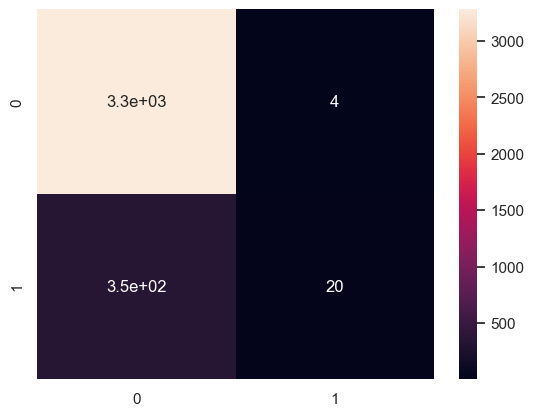

In [12]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)
plt.show()

### Precision

In [13]:
print("Precision Score is - ", precision_score(y_test, y_pred))

Precision Score is -  0.8333333333333334


### Recall

In [14]:
print("Recall Score is - ", recall_score(y_test, y_pred))

Recall Score is -  0.0546448087431694


### F1 Score

In [15]:
print("F1 Score is - ", f1_score(y_test, y_pred))

F1 Score is -  0.10256410256410256


### ROC/AUC

In [16]:
auc = roc_auc_score(y_test, y_pred)
print("AUC score:- ", auc)

AUC score:-  0.5267137616448654


### ROC Curve

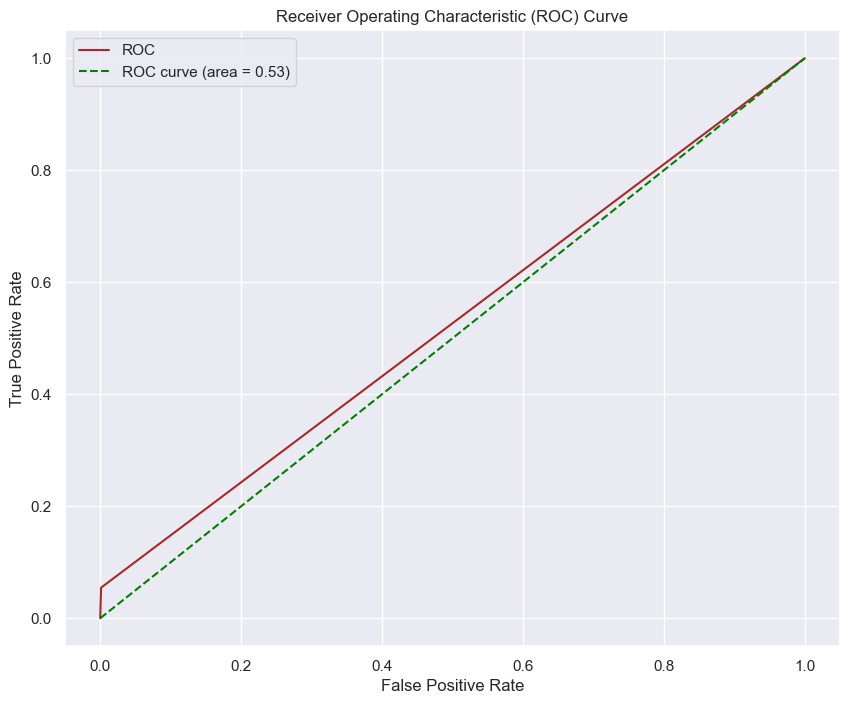

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='brown', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### K-Fold Cross Validation

In [18]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(cv_scores))

Cross-validation scores:[0.90734824 0.90917389 0.90780466 0.90552259 0.9086758 ]


We can summarize the cross-validation accuracy by calculating its mean.

In [19]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(cv_scores.mean()))

Average cross-validation score: 0.9077


### MODEL EVALUATION SUMMARY :  
                    Model Accuracy : 0.9041
                    Precision      : 0.8333
                    Recall         : 0.0546
                    F1 Score       : 0.1025
                    AUC            : 0.5267
                    K-Fold         : 0.9077

### Model Understanding
Examining feature_importances is a quick and easy way to comprehend a model's findings. There are several ways to calculate feature importance, however using the Random Forest classifier, we are able to extract feature_importances using the built-in approach on the trained model. feature_importances reflect the importance of a feature within the prediction model. The amount of times each feature is used for splitting across all trees in the Random Forest scenario is represented by the feature importance.

In [20]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

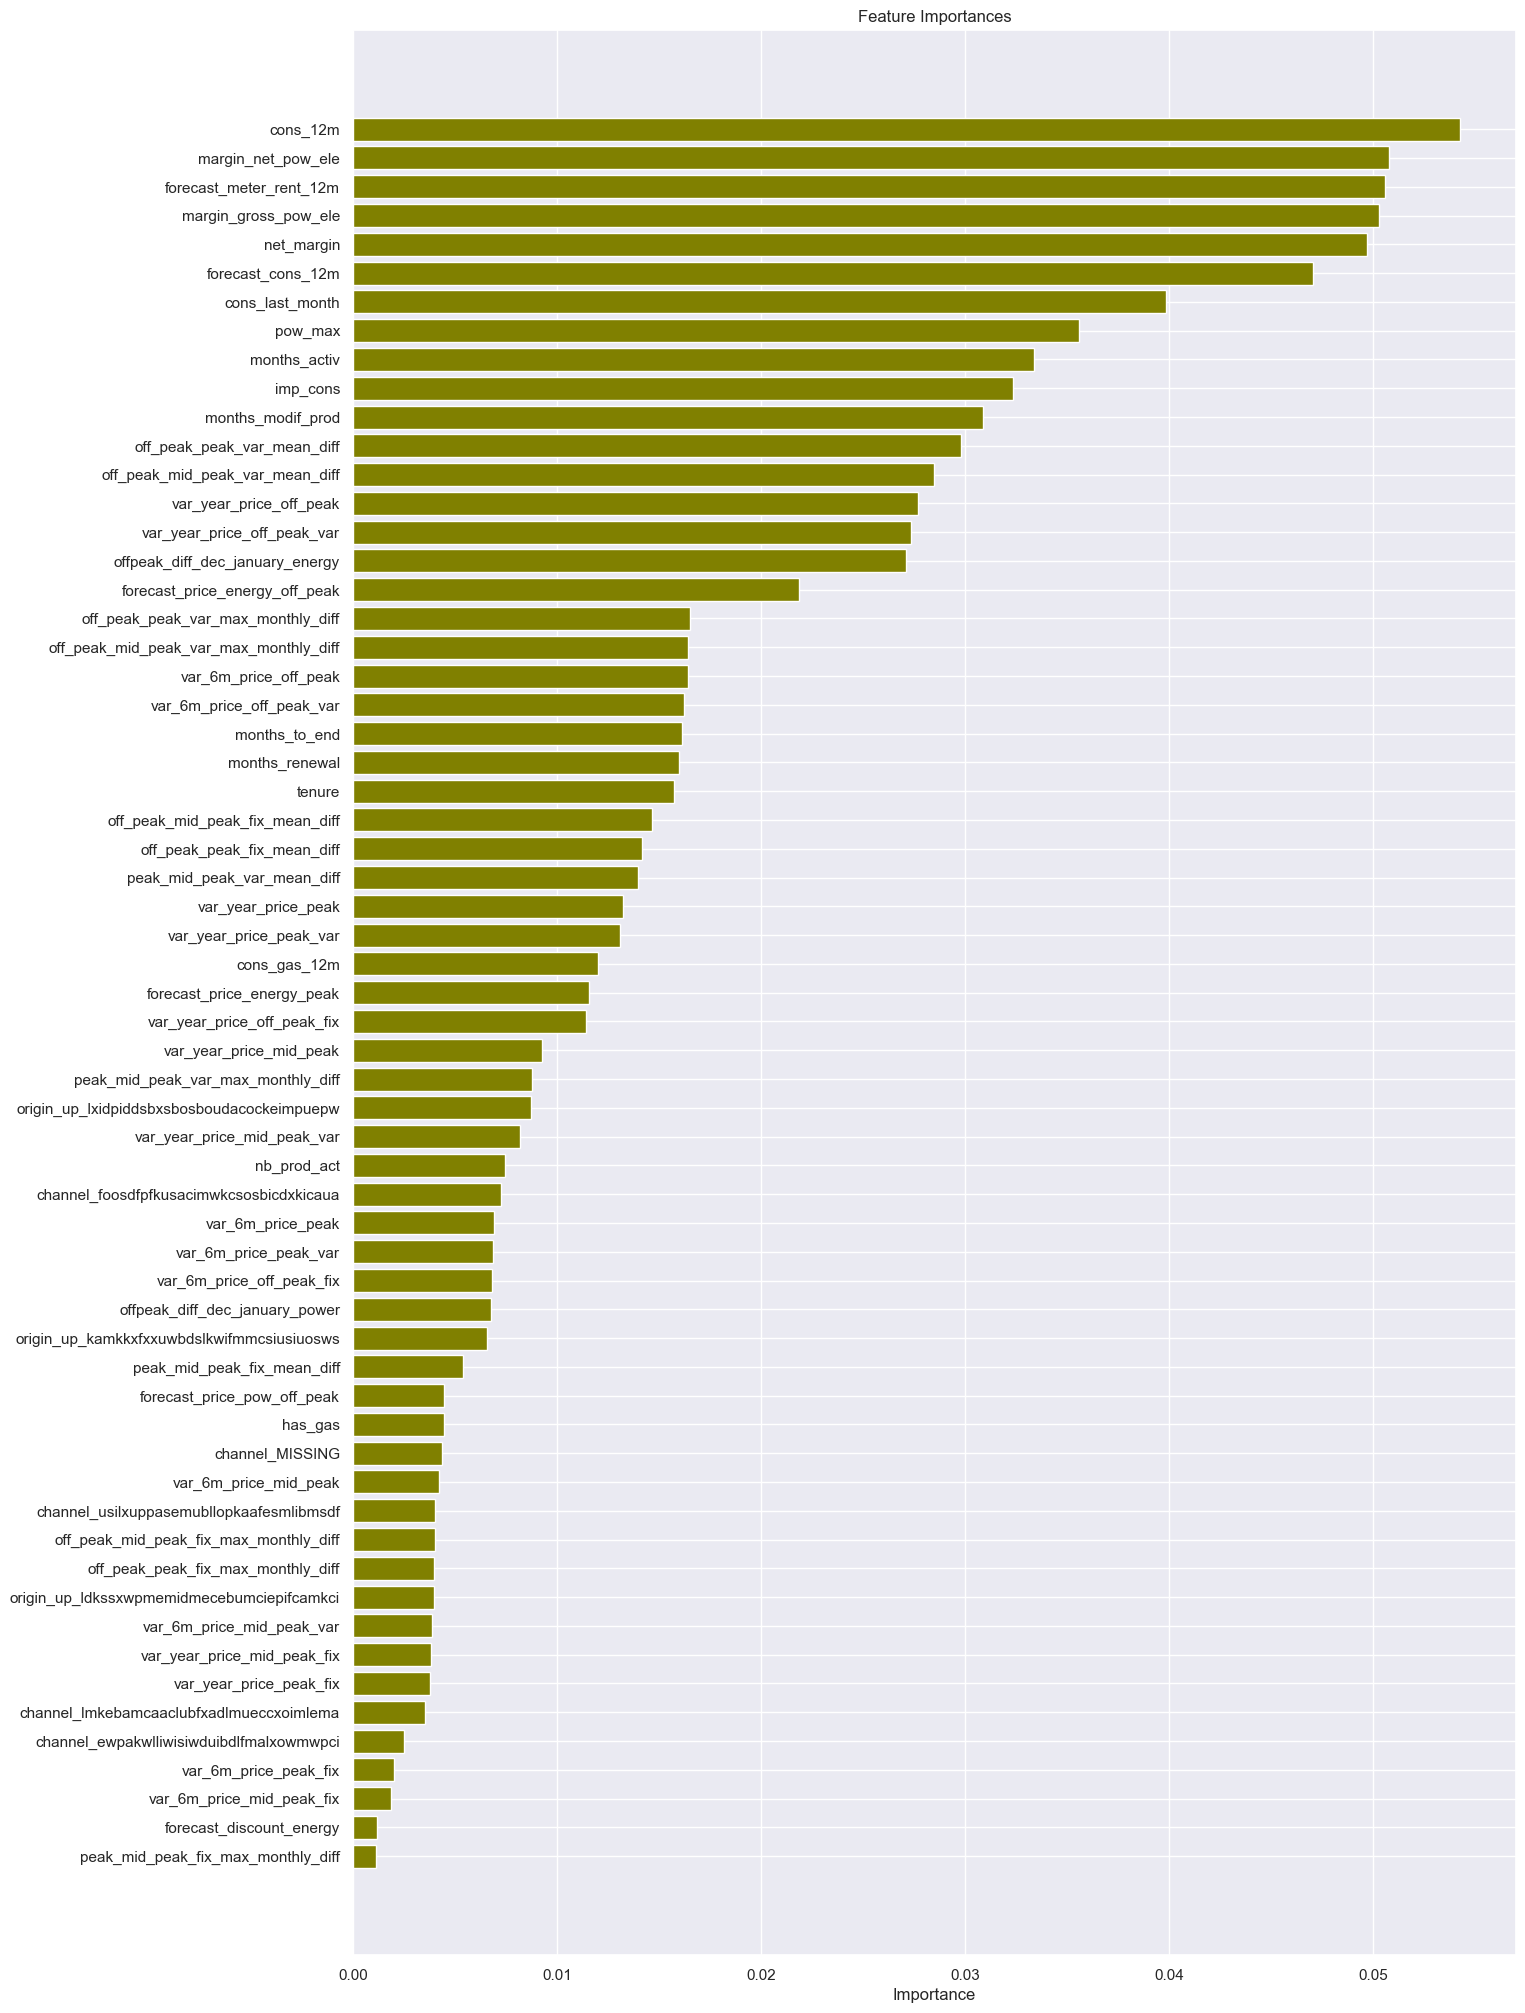

In [21]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='olive', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

Net margin on power subscription and consumption over 12 months is a top driver for churn in this model Forecasted bill of meter rental for the next 2 months also is an influential driver Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it Our price sensitivity features are scattered around but are not the main driver for a customer churning The last observation is important because this relates back to our original hypothesis:

Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

In [22]:
proba_predictions = rf_classifier.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [23]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [24]:
# Saving the dataframe to "predicted_data.csv" file
X_test['churn'] = y_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv(os.path.join(path, '01 Data', 'Prepared Data','predicted_data.csv'))

### Business impact of discount  
We conduct a brief analysis on the discount strategy proposed. This is just 1 way to solve it, there may be many other ways!  

The SME division head proposed that we give a 20% discount to high propensity to churn customers. We can assume to start that everyone who is offered a discount will accept it.  

### Workflow  
Our task is to calculate the forecast revenue for the set of customers:  

When no discount is offered  
And when a discount is offered based on a probability cutoff to decide who should receive the 20% discount  
And hence to decide where the cut-off should be set in order to maximise revenue  

### Data loading  

In [25]:
test_data = pd.read_csv(os.path.join(path, '01 Data', 'Prepared Data','predicted_data.csv'))
test_data.drop(test_data.columns[0], axis=1, inplace=True)
test_data.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability
0,4.173390,4.193598,3.165541,3.168368,0.0,2.073828,0.114667,0.099548,40.606701,1,...,0,0,1,0,0,0,0,1,0,0.101
1,4.075036,0.000000,3.003461,3.305998,30.0,1.255031,0.198096,0.000000,46.305378,0,...,0,0,1,0,0,0,0,1,0,0.160
2,3.848435,0.000000,0.000000,2.756568,0.0,1.289366,0.141434,0.000000,44.311378,0,...,0,0,1,0,0,0,0,1,0,0.029
3,4.345433,0.000000,0.000000,3.516690,0.0,1.304921,0.142996,0.000000,44.311378,0,...,0,0,1,0,0,0,0,1,0,0.098
4,4.185655,0.000000,3.355834,3.208148,0.0,2.123067,0.120372,0.103487,40.606701,0,...,0,0,1,0,0,0,1,0,0,0.064


Calculating a baseline revenue estimate (no intervention) Calculate a baseline estimate of the electricity revenue for every customer for the next twelve months based on the forecast consumption and forecast price and actual churn outcome. Call this basecase_revenue.

For customers who end up churning, we should reduce our forecast revenue calculation by 91.9% to account for the customers churn some time between January 2016 and the start of March 2016. (Not knowing when they churn, a reasonable assumption for the lost revenue is the average of 100%, corresponding to churn on 1 January 2016, and 83.9%, corresponding to churn at the end of February, or 59 days into a 365 day year). Call this new variable basecase_revenue_after_churn, ie basecase_revenue_after_churn = basecase_revenue(1 -0.919 churn)

In [26]:
# Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more data)
# Note that we need to reverse the log10-transformation from the data cleaning step

test_data['basecase_revenue'] = (np.power(10, test_data['forecast_cons_12m']) + 1) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']

# Taking churn into account
test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn'])


In [27]:
test_data.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability,basecase_revenue,basecase_revenue_after_churn
0,4.173390,4.193598,3.165541,3.168368,0.0,2.073828,0.114667,0.099548,40.606701,1,...,1,0,0,0,0,1,0,0.101,171.157200,171.157200
1,4.075036,0.000000,3.003461,3.305998,30.0,1.255031,0.198096,0.000000,46.305378,0,...,1,0,0,0,0,1,0,0.160,402.203316,402.203316
2,3.848435,0.000000,0.000000,2.756568,0.0,1.289366,0.141434,0.000000,44.311378,0,...,1,0,0,0,0,1,0,0.029,82.176885,82.176885
3,4.345433,0.000000,0.000000,3.516690,0.0,1.304921,0.142996,0.000000,44.311378,0,...,1,0,0,0,0,1,0,0.098,471.357082,471.357082
4,4.185655,0.000000,3.355834,3.208148,0.0,2.123067,0.120372,0.103487,40.606701,0,...,1,0,0,0,1,0,0,0.064,196.633386,196.633386


Calculate the estimated benefits and costs of intervention
Now, pick a cut-off probability (eg 0.5) so that

Customers with a higher churn probability than the cut-off get a discount, and
Customers below the churn-probability do not get a discount.
From this, calculate the revenue of the intervention scenario assuming:

All customers who are offered a discount accept it
Customers who do receive a discount are are assumed not to churn in the next twelve months (ie churn probability = 0), and therefore the retained
revenue is 0.8basecase_revenue , being (1-discount_fraction)basecase_revenue

Customers who do not receive a discount are assumed to churn based on the observed dependent variable (ie, a 1 or 0 for whether they actually
churned or not).

Now, map out the revenue delta as a function of the cut-off probability in a graph. What cut-off probability approximately optimises the revenue outcome? Assume for these calculations that the customer does not consume more or less electricity because the price changes. In practice, we would expect that if the customer's cost goes down then their consumption might increase. We will see two counterbalancing effects at play:

For true positives we will see revenue retention vs the no-discount scenario
For false positives we will see reduced revenue from giving them a discount when they wouldn't in fact churn.
(False negatives represent an opportunity cost but not an actual cost difference between the two scenarios.)

The optimal cut-off point will balance the benefits from true positives against the costs of false positives. Our task is to approximately find the optimal cut-off point. We may need to make additional assumptions. If we feel the assumptions above aren't justified and that others are better then we should modify our assumptions.

In [28]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year, independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

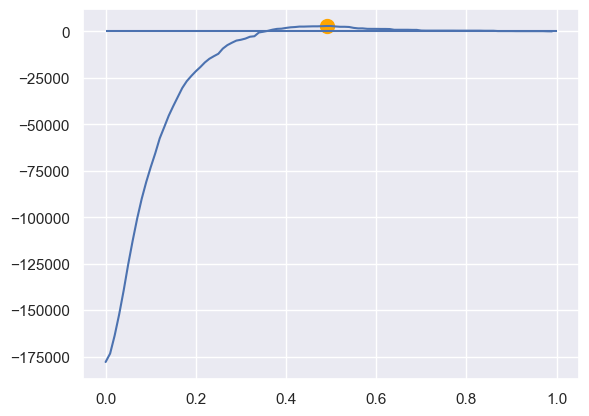

Maximum benefit at cutoff 0.49 with revenue delta of $2,876.61


In [29]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='orange')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

### Optional extra: how to select the cut-off? 
Above, we decided who to offer the discount to based on a probability cut-off. Is this the optimal strategy?

For instance, we might be offering discounts to customers who are not very profitable, thus worsening our overall margins substantially. For example, if offering a discount makes the customer unprofitable on a net margin basis then we might want to let them churn rather than save them.

Even if we only consider revenue, this strategy might not be optimal from a revenue viewpoint. For instance, we can calculate the expected revenue impact of our strategy and prioritise customers for discounts that have a high expected revenue impact. (This means that the probability of churn might be high but they also might be valuable customers).

A general principle here is that we can afford to spend more on retaining high-value customers because the costs of losing them are higher. A very common mistake in business applications of churn is to focus on the churn probability whilst forgetting the value impact (to greater or lesser extents). We have seen many cases where our clients spend as much effort on retaining unprofitable customers as they do on retaining highly profitable customers.

In [30]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2, min_rev: float=500):
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff and rev
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given for high-value customers => customer stays for full year, independent
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[(pred['churn_probability'] >= cutoff) & (pred['basecase_revenue'] > min_rev),
    'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

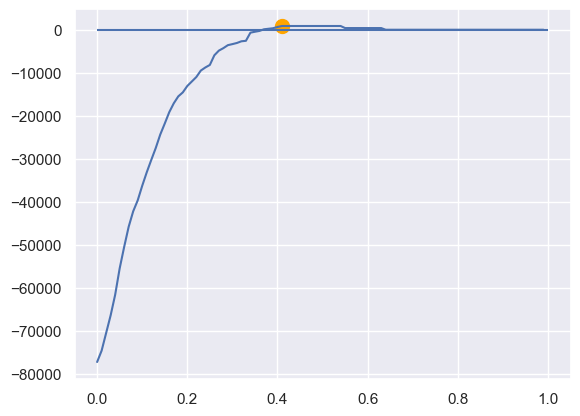

Maximum benefit at cutoff 0.41000000000000003 with revenue delta of $874.63


In [31]:
## Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas_high_value = pd.Series({cutoff: get_rev_delta_high_value(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
plot_tradeoff(rev_deltas_high_value)

#### Note:
In this case, it doesn't make sense to prioritize large-revenue customers, since the overall revenue delta is much lower than when targeting everyone. However, this is only the case here since the intervention doesn't depend on the number of customers (simply adjusting prices). The interventions usually go beyond simply adjusting prices to prevent churn. There may be the option of intensifying the customer relation, adding key account managers, or other interventions that do incur costs depending on how many customers are targeted. In that case, it may be benefitial to target only a subset of customers to save on these costs, even if the delta in the figure above is reduced.

### Optional extra: Using forecast rather than actual churn
We may have noticed above that we used actual churn outcomes in calculating the financial impact. Actual churn outcomes are fine if we know them and are conducting a retrospective analysis of the effectiveness of a strategy. This example of analysis is commonly known as "backtesting", ie seeing how well a strategy would have performed historically.

Of course, one must be careful that any analysis is done using out-of-sample data. Conducting the analysis on the training data will lead to predictions that are too optimistic.

In practice, actual outcomes may not be available because they are in the future. An alternative is to optimise predicted/forecast revenue based on the probabilities which are an output from our churn model. In this case, we would replace the actual churn outcomes (churn) with the predicted probability of churn from our model. The results here are obviously model-dependent.

If our model probabilities are poorly calibrated then we can end up with quite poor results from this. Going down this path therefore usually requires the extra step of checking how well calibrated the model probabilities are, and potentially correcting for any miscalibration using Platt scaling, sigmoid calibration or isotonic regression.

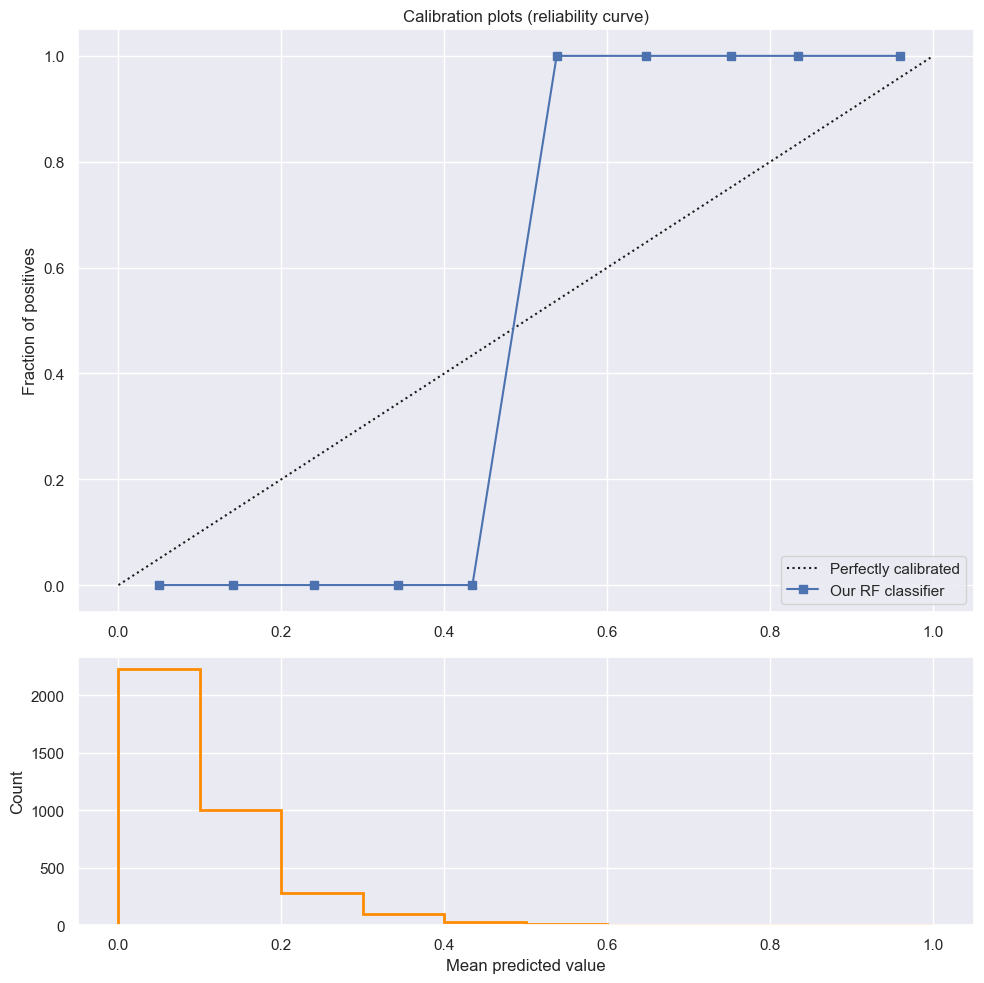

In [33]:
# Check our calibration

from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true=test_data['churn'],
    y_prob=test_data['churn_probability'],
    n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF classifier")
ax2.hist(test_data['churn_probability'], range=(0, 1), bins=10, color='darkorange', histtype="step", lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

#### This chart tells us a few things:
The top calibration curve exhibits a sigmoid curve, which is typical for an under-confident classifier. The bottom chart shows us that the model is postively skewed toward predicting a probability, perhaps due to having such low confidence.

In [34]:
# Electricity evenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more d
# Note that we need to reverse the log10-transformation from the data cleaning step

test_data['basecase_revenue'] = np.power(10, test_data['forecast_cons_12m']) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']
# Taking churn into account
test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn_probability'])

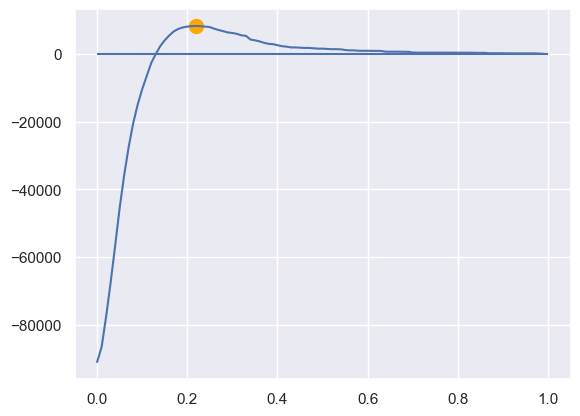

Maximum benefit at cutoff 0.22 with revenue delta of $8,182.37


In [35]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas)